<a href="https://colab.research.google.com/github/D-Studios/Predicting-Median-Home-Prices-And-Inflation-Adjusted-Prices-In-The-USA-Given-A-Date/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Project: Predicting Median Home Prices And Inflation Adjusted Prices In The USA Given A Date
#Created By: Devang Bhatnagar

import requests
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math

#This code gets a table from a website to store as a csv file. 
url = 'https://dqydj.com/historical-home-prices/'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[0]
print(df)
df.to_csv('data.csv')

                        0                        1                         2
0    Month of Observation  Median Home Price (NSA)  Inflation Adjusted Price
1                  1/1/53               $18,080.26               $180,039.29
2                  2/1/53               $18,080.26               $180,718.68
3                  3/1/53               $18,080.26               $180,039.29
4                  4/1/53               $18,122.25               $180,457.41
..                    ...                      ...                       ...
815               11/1/20              $299,006.77               $304,347.38
816               12/1/20              $300,929.02               $306,015.86
817                1/1/21              $303,331.84               $307,152.74
818                2/1/21              $307,849.14               $310,029.72
819                3/1/21              $314,769.26               $314,769.26

[820 rows x 3 columns]


In [ ]:
#This function will aid in determining what century the year is in.
def to_datetime(dates, historical_data=True):
  for i in range(len(dates)):
    numbers = dates[i].split("/")
    year = int(numbers[2])
    if year>21 and historical_data:
      year+=1900
    numbers[2]=str(year)
    dates[i]=numbers[0]+"/"+numbers[1]+"/"+numbers[2]
  return dates


In [ ]:
#The csv file is taken and all of the table values are converted from strings to numerical values that can be used for computation.
Housing = pd.read_csv('data.csv')
Housing = Housing.iloc[1: , :]
housing_array=[]
for element in Housing['0']:
  housing_array.append(element)
housing_array=to_datetime(housing_array)
Housing['0'] = pd.to_datetime(housing_array)
Housing['0'] = Housing['0'].map(dt.datetime.toordinal) - 712954
Housing['1'] = Housing['1'].replace({'\$':''}, regex = True)
Housing['1'] = Housing['1'].replace({'\,':''}, regex = True)
Housing['2'] = Housing['2'].replace({'\$':''}, regex = True)
Housing['2'] = Housing['2'].replace({'\,':''}, regex = True)
Housing['0'] = Housing['0'].astype(int)
Housing['1'] = Housing['1'].astype(float)
Housing['2'] = Housing['2'].astype(float)
Housing

,Unnamed: 0,0,1,2
1,1,0,18080.26,180039.29
2,2,31,18080.26,180718.68
3,3,59,18080.26,180039.29
4,4,90,18122.25,180457.41
5,5,120,18143.25,179989.87
...,...,...,...,...
815,815,24776,299006.77,304347.38
816,816,24806,300929.02,306015.86
817,817,24837,303331.84,307152.74
818,818,24868,307849.14,310029.72


In [ ]:
#The non-linear data is transformed using logarithms in order to create a more accurate linear regression model.
Y1 = Housing['1']
Y2 = Housing['2']
Y1=[]
Y2=[]
for y in range(1, len(Housing['1'])+1):
  Y1.append(math.log(Housing['1'][y]))
for y in range(1, len(Housing['2'])+1):
  Y2.append(math.log(Housing['2'][y]))
print(Y1)
Y2


[9.802576014373741, 9.802576014373741, 9.802576014373741, 9.804895744073674, 9.806053869694287, 9.806053869694287, 9.808366104920763, 9.809520220707745, 9.81067300604682, 9.81067300604682, 9.809520220707745, 9.809520220707745, 9.809520220707745, 9.81067300604682, 9.81067300604682, 9.809520220707745, 9.809520220707745, 9.81067300604682, 9.814123409962901, 9.816416537404544, 9.81870496268145, 9.817561404654134, 9.817561404654134, 9.81870496268145, 9.819847214477411, 9.816416537404544, 9.814123409962901, 9.808366104920763, 9.808366104920763, 9.81297459762632, 9.816416537404544, 9.82212781128783, 9.824403218808872, 9.823266162233136, 9.820988163022706, 9.81870496268145, 9.816416537404544, 9.81297459762632, 9.809520220707745, 9.804895744073674, 9.806053869694287, 9.816416537404544, 9.824403218808872, 9.831198002972519, 9.830068650611285, 9.82893856007032, 9.826673460602438, 9.827806651670691, 9.831198002972519, 9.840187197887301, 9.840187197887301, 9.846875930354841, 9.850203857562272, 9.84

[12.100930383830997,
 12.104696846998344,
 12.100930383830997,
 12.10325007323448,
 12.100655850510917,
 12.096917550665399,
 12.099229809556007,
 12.096659484542986,
 12.097812262652063,
 12.094101718052695,
 12.096659484542986,
 12.096659484542986,
 12.096659484542986,
 12.097812262652063,
 12.097812262652063,
 12.100383909347217,
 12.096659484542986,
 12.097812262652063,
 12.10126270050274,
 12.103555805015127,
 12.109568628385553,
 12.108425086181356,
 12.108425086181356,
 12.113306980700106,
 12.114449231246244,
 12.111018557931441,
 12.108725437391683,
 12.1029680832948,
 12.1029680832948,
 12.107576626324365,
 12.107280234791135,
 12.11299148461639,
 12.111542491426686,
 12.110405442000463,
 12.108127457137975,
 12.109568628385553,
 12.107280234791135,
 12.103838293881267,
 12.100383909347217,
 12.09203503699647,
 12.089482591737866,
 12.092465105346763,
 12.093125759328615,
 12.1035768559568,
 12.098791230570468,
 12.094018108151836,
 12.091753005389574,
 12.089256429852696,
 1

In [ ]:
#The oordinal time for the date will be stored in the X variable.
X = Housing['0']
X

1          0
2         31
3         59
4         90
5        120
       ...  
815    24776
816    24806
817    24837
818    24868
819    24896
Name: 0, Length: 819, dtype: int64

In [ ]:
#This library allows the usage of splitting data into training and testing datasets.
from sklearn.model_selection import train_test_split

In [ ]:
#Training and testing datasets are created for both the Median Home Price (NSA) and the Inflation Adjusted Price.
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y1, test_size=0.2)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y2, test_size=0.2)

In [ ]:
#The models will be using linear regression.
model1 = linear_model.LinearRegression()
model2 = linear_model.LinearRegression()

In [ ]:
#The X training datasets are converted into 2D arrays. They are fitted to their respective Y_trains.
model1.fit(np.array(X_train1).reshape(-1,1), Y_train1)
model2.fit(np.array(X_train2).reshape(-1,1), Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#This block of code is used to make the model predict what the output should be given the input.
Y_pred1 = model1.predict(np.array(X_test1).reshape(-1,1))
Y_pred2 = model2.predict(np.array(X_test2).reshape(-1,1))
Y_pred1

array([11.62791054, 10.75688414, 11.89598743,  9.82391525, 10.76863405,
       10.3257133 , 11.39470024, 12.33162834, 11.04079788, 10.10386977,
       12.00109809, 11.11078651, 11.67056784,  9.81612454, 12.19522714,
       11.05637929,  9.53629773, 11.28958958, 11.80671361, 11.97376677,
       10.96301854, 10.71805833, 11.65102722, 10.55100517, 12.38578013,
       10.97476845, 12.41311146, 10.24001554, 12.24184366, 10.06900317,
        9.63732147, 11.90377813, 10.37986509, 12.07083129,  9.6530306 ,
       10.99022215, 12.45972797, 11.41398543,  9.97960164, 12.20301785,
       10.53542376, 12.24580287, 11.3439968 , 12.01642407, 10.71422683,
       10.22443413,  9.95252574, 10.39148729, 11.44527597, 12.27696569,
        9.57933819, 10.94347792, 12.35474503, 12.11374403, 12.70085669,
       10.88549463, 11.69381224, 11.39074103, 10.53146455,  9.73464143,
       11.03683866, 10.09607907, 10.93964642,  9.81254848,  9.84345587,
       11.48397406, 10.90465211,  9.65686209, 11.96201685, 11.67

In [ ]:
#This block of code lists the attributes of the linear regression models, including the equations, mean squared errors, and r^2 scores.
print("Median Home Price (NSA)")
print('Coefficients:', model1.coef_)
print('Intercept:', model1.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test1, Y_pred1))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test1, Y_pred1))
 
print("\n\nInflation Adjusted Price")
print('Coefficients:', model2.coef_)
print('Intercept:', model2.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test2, Y_pred2))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test2, Y_pred2))

Median Home Price (NSA)
Coefficients: [0.00012772]
Intercept: 9.528762460964307
Mean squared error (MSE): 0.03
Coefficient of determination (R^2): 0.97


Inflation Adjusted Price
Coefficients: [1.85745697e-05]
Intercept: 11.957235848115356
Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.66


In [ ]:
#Seaborn is used for statistical data visualization.
import seaborn as sns

In [ ]:
#This block of code shows the testing datasets for the outputs.
print(Y_test1)
print("\n\n\n")
print(Y_test2)

In [ ]:
#This block of code shows the predictions of outputs for the testing datasets of the x-variables.
print(Y_pred1)
print("\n\n\n")
print(Y_pred2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


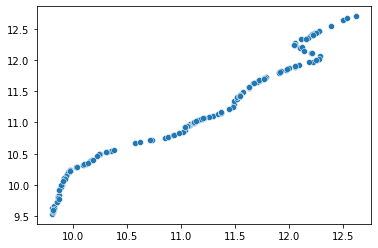

In [ ]:
#This is a scatterplot where the testing dataset (Y_test1) is on the x-axis, while the predictions(Y_pred1) are on the y-axis.
sns.scatterplot(Y_test1, Y_pred1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


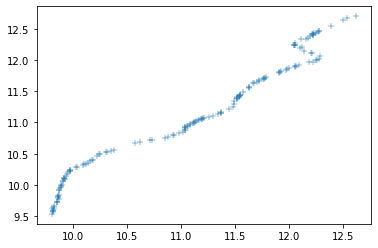

In [ ]:
#This is the same scatterplot as above, except the points are changed to + signs instead of dots.
sns.scatterplot(np.array(Y_test1), np.array(Y_pred1), marker="+")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


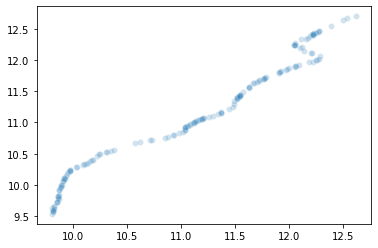

In [ ]:
#This is the same scatterplot as above, except this plot changes the alpha component of the points instead of the signs.
sns.scatterplot(np.array(Y_test1), np.array(Y_pred1), alpha=0.2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


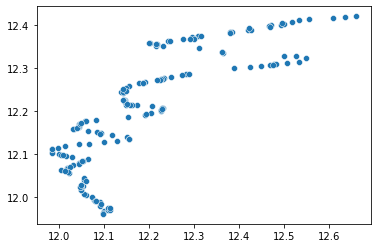

In [ ]:
#This is a scatterplot where the testing dataset (Y_test2) is on the x-axis, while the predictions(Y_pred2) are on the y-axis.
sns.scatterplot(np.array(Y_test2), np.array(Y_pred2))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


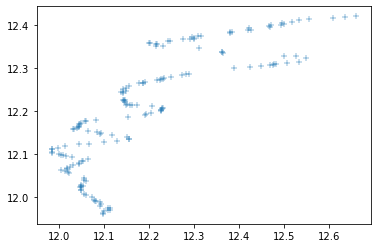

In [ ]:
#This is the same scatterplot as above, except the points are changed to + signs instead of dots.
sns.scatterplot(np.array(Y_test2), np.array(Y_pred2), marker="+")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


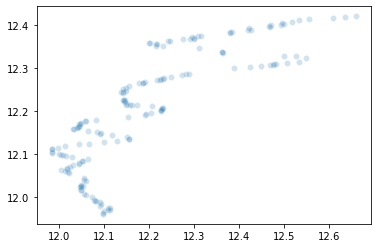

In [ ]:
#This is the same scatterplot as above, except this plot changes the alpha component of the points instead of the signs.
sns.scatterplot(np.array(Y_test2), np.array(Y_pred2), alpha=0.2)

In [ ]:
#This block of code is used to calculate the residuals from the predictions and actual datapoints.
residuals_median_home_price = []
for i in range(0, len(Y_pred1)):
  residuals_median_home_price.append(Y_test1[i]-Y_pred1[i])
residuals_inflation_adjusted_price=[]
for i in range(0, len(Y_pred2)):
  residuals_inflation_adjusted_price.append(Y_test2[i]-Y_pred2[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


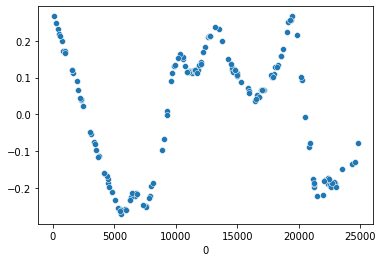

In [ ]:
#This is a scatterplot where the tested x-points are on the x-axis, while the residuals for the Median Home Price are on the y-axis. 
sns.scatterplot(X_test1, residuals_median_home_price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


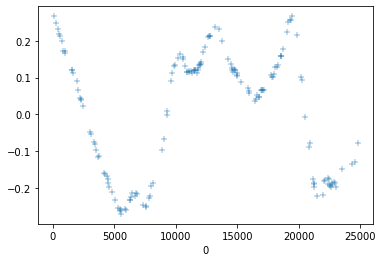

In [ ]:
#This is the same scatterplot as above, except the points are changed to + signs instead of dots.
sns.scatterplot(X_test1, residuals_median_home_price, marker='+')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


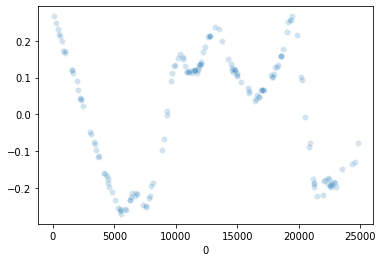

In [ ]:
#This is the same scatterplot as above, except this plot changes the alpha component of the points instead of the signs.
sns.scatterplot(X_test1, residuals_median_home_price, alpha=0.2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


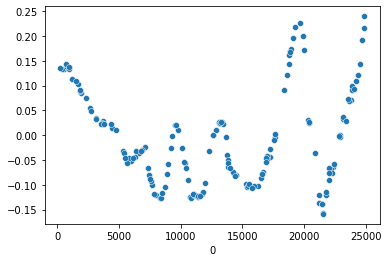

In [ ]:
#This is a scatterplot where the tested x-points are on the x-axis, while the residuals for the Inflation Adjusted Price are on the y-axis. 
sns.scatterplot(X_test2, residuals_inflation_adjusted_price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


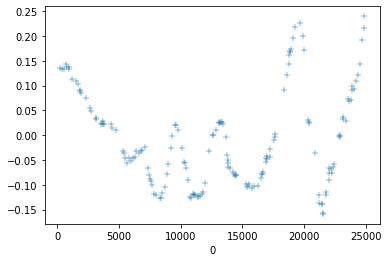

In [ ]:
#This is the same scatterplot as above, except the points are changed to + signs instead of dots.
sns.scatterplot(X_test2, residuals_inflation_adjusted_price, marker='+')

In [ ]:
#This is the same scatterplot as above, except this plot changes the alpha component of the points instead of the signs.
sns.scatterplot(X_test2, residuals_inflation_adjusted_price, alpha=0.2)

In [ ]:
#In this block of code, the program will try to predict the Median Home Price and Inflation Adjusted Price given user entered dates.
print("Predicting Home Prices Using Dates: ")
while True:
  try:
    date=input("Enter in a date in month/day/year format. Type STOP to stop. ")
    if date=="STOP":
      break
    date_array=[]
    date_array.append(date)
    date_array=to_datetime(date_array, False)
    date_array=pd.to_datetime(date_array)
    date_array=date_array.map(dt.datetime.toordinal)-712954
    date_array.astype(int)
    x = np.array(date_array).reshape(-1,1)
    y = model1.predict(x)[0]
    y=int(math.exp(y))
    print("The Median Home Price (NSA) on this date will probably be around " + str(y)+" dollars")
    y2=model2.predict(x)[0]
    y2=int(math.exp(y2))
    print("The Inflation Adjusted Price on this date will probably be around " + str(y2) + " dollars")
    print("--------------------------------------------------------------------------------------------")
  except:
    print("An error has occurred. Please try again.")

Predicting Home Prices Using Dates: 
An error has occurred. Please try again.
The Median Home Price (NSA) on this date will probably be around 1202 dollars
The Inflation Adjusted Price on this date will probably be around 109415 dollars
--------------------------------------------------------------------------------------------
An error has occurred. Please try again.
The Median Home Price (NSA) on this date will probably be around 1438290090 dollars
The Inflation Adjusted Price on this date will probably be around 837501 dollars
--------------------------------------------------------------------------------------------
The Median Home Price (NSA) on this date will probably be around 127680 dollars
The Inflation Adjusted Price on this date will probably be around 215635 dollars
--------------------------------------------------------------------------------------------
An error has occurred. Please try again.
The Median Home Price (NSA) on this date will probably be around 324569 doll